$\textbf{Taller 5 Metodos Computacionales 2}$

$\textbf{Punto 1) Monte Carlo y la integral de camino de Feynman}$

In [27]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
A = 0.1 
lamb = 670e-7 
D = 30 
a = 0.01 
d = 0.09 

N = 10000
z = np.linspace(-0.4, 0.4, 1000)

arr1 = np.zeros(len(z))

def clasica(z):
    theta = np.arctan2(z,D)
    val= (np.cos((np.pi*d/lamb)*np.sin(theta)))**2*(np.sinc((a/lamb)*np.sin(theta)))**2
    return val

for i in range(len(z)):
    arr1[i] = clasica(z[i])
    
arr1 = arr1/np.max(arr1)



def feynman(x,y,z):
    val = np.mean(np.exp(((2* np.pi*1j )/ lamb)* 2*D)*np.exp((np.pi * 1j) / (lamb* D) * (x - y)**2)*np.exp((np.pi * 1j) / (lamb * D) * (z - y)**2))
    return val

arr2 = np.zeros(len(z))

for i in range(len(z)):
    x = np.random.uniform(-A/2, A/2, size=N)
    y = np.random.uniform(d/2-a/2, d/2+a/2, size=N)*np.random.choice([-1,1], N)
    arr2[i] = np.absolute(feynman(x,y,z[i]))*A*a
arr2 = arr2/np.max(arr2)
    


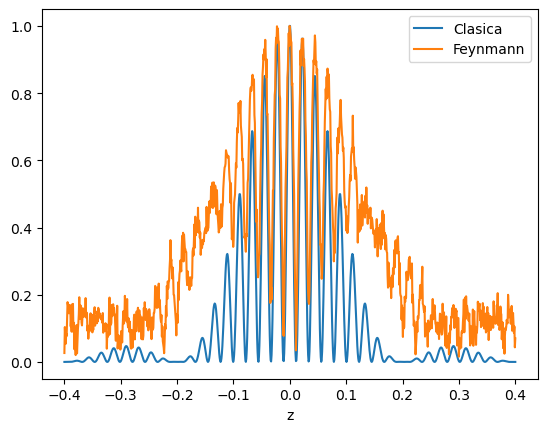

In [29]:
plt.plot(z, arr1,label="Clasica")
plt.plot(z, arr2, label="Feynmann")
plt.xlabel("z")
plt.legend()
plt.show()